<a href="https://colab.research.google.com/github/ayd13/Machine-learning-projects/blob/master/Term_Project_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# initial needed packages
 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)
 
#Mount your Google drive so you can read them easilu
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import fileinput

filePath  ='/content/gdrive/My Drive/Machine Learning/ML Class UofT/Term_Project/BNG_credit-g.csv'

In [3]:
# Create dataframe
import pandas as pd

data = pd.read_csv(filePath )

In [4]:
# all other needed packages
 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
 
# install feature-engine package
! pip install feature-engine
 
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
 
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
 
from sklearn.pipeline import Pipeline

In [5]:
data.shape

(1000000, 21)

**Attribute Information:**

*Attribute 1:* (qualitative)

checking_status: Status of existing checking account
- < 0 DM,
- 0 <= ... < 200 DM, 
- ... >= 200 DM / salary assignments for at least 1 year, 
- No checking account)

*Duration* in month

*Attribute 3:* (qualitative)

Credit history
- No credits taken/ all credits paid back duly
- All credits at this bank paid back duly
- Existing credits paid back duly till now
- Delay in paying off in the past
- Critical account/ other credits existing (not at this bank)

*Attribute 4:* (qualitative)

Purpose
- Car (new)
- Car (used)
- Furniture/equipment
- Radio/television
- Domestic appliances
- Repairs
- Education
- (vacation - does not exist?)
- Retraining
- Business
- Others

*Attribute 5:* (numerical)

credit_amount: Credit amount

*Attibute 6:* (qualitative)

savings_status: Savings account/bonds
- ... < 100 DM
- 100 <= ... < 500 DM
- 500 <= ... < 1000 DM
- .. >= 1000 DM
- unknown/ no savings account

*Attribute 7:* (qualitative)

Employment: Present employment since
- unemployed
- ... < 1 year
- 1 <= ... < 4 years
- 4 <= ... < 7 years
- .. >= 7 years

*Attribute 8:* (numerical)

installment_commitment: Installment rate in percentage of disposable income

*Attribute 9:* (qualitative)

personal_status: Personal status and sex
- male : divorced / separated
- female : divorced / separated / married
- male : single
- male : married/widowed
- female : single

*Attribute 10:* (qualitative)

Other_Parties: Other debtors / guarantors
- none
- co-applicant
- guarantor

*Attribute 11:* (numerical)

residence_since: Present residence since

*Attribute 12:* (qualitative)

property_magnitude
- real estate
- if not A121 : building society savings agreement/ life insurance
- if not A121/A122 : car or other, not in attribute 6
- unknown / no property

*Attribute 13:* (numerical)

Age: Age in years

*Attribute 14:* (qualitative)

Other_payments: Other installment plans
- bank
- stores
- none

*Attribute 15: *(qualitative)

Housing
- rent
- own
- for free

*Attribute 16:* (numerical)

existing_credits
Number of existing credits at this bank

*Attribute 17:* (qualitative)

Job
- unemployed/ unskilled - non-resident
- unskilled - resident
- skilled employee / official
- management/ self-employed/
- highly qualified employee/ officer

*Attribute 18:* (numerical)

num_dependents
Number of people being liable to provide maintenance for

*Attribute 19:* (qualitative)

Own_Telephone
- none
- yes, registered under the customers name

*Attribute 20:* (qualitative)

foreign worker
- yes
- no

*Attribute 21: *

Class
- good
- bad

In [6]:
data.head(10)

checking_status   duration  ... foreign_worker class
0              <0  12.046734  ...            yes   bad
1   'no checking'   7.611170  ...             no  good
2   'no checking'  16.926853  ...            yes  good
3              <0  43.088352  ...            yes   bad
4           >=200  52.761614  ...            yes  good
5              <0  41.266553  ...            yes   bad
6        0<=X<200  17.271734  ...            yes   bad
7              <0  25.135795  ...            yes  good
8        0<=X<200  23.160591  ...             no  good
9              <0  44.744560  ...            yes   bad

[10 rows x 21 columns]

In [7]:
data.describe()

duration   credit_amount  ...  existing_credits  num_dependents
count  1000000.000000  1000000.000000  ...    1000000.000000  1000000.000000
mean        20.891879     3210.124716  ...          1.426606        1.157826
std         12.055036     2779.716041  ...          0.611262        0.364578
min         -1.543527    -5997.669542  ...          1.000000        1.000000
25%         11.968091     1389.640085  ...          1.000000        1.000000
50%         18.117446     2285.628741  ...          1.000000        1.000000
75%         24.928179     3825.210598  ...          2.000000        1.000000
max         78.343283    22001.953049  ...          4.000000        2.000000

[8 rows x 7 columns]

In [8]:
# check if any column has null value

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

[]

In [9]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in data.columns if data[c].dtypes=='O']
features_categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [10]:
# find numerical variables
# those different from object
features_numerical = [c for c in data.columns if data[c].dtypes!='O']
features_numerical

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [11]:
# Get distinct values of all catagorical columns

for col in features_categorical:
   print ('\nunique values for %s'%col)
   print (data[col].unique())


unique values for checking_status
['<0' "'no checking'" '>=200' '0<=X<200']

unique values for credit_history
["'no credits/all paid'" "'existing paid'" "'delayed previously'"
 "'critical/other existing credit'" "'all paid'"]

unique values for purpose
['business' "'new car'" 'radio/tv' 'furniture/equipment' "'used car'"
 'repairs' 'retraining' 'education' 'other' "'domestic appliance'"
 'vacation']

unique values for savings_status
["'no known savings'" '<100' '500<=X<1000' '100<=X<500' '>=1000']

unique values for employment
['>=7' '1<=X<4' '<1' 'unemployed' '4<=X<7']

unique values for personal_status
["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"
 "'female single'"]

unique values for other_parties
['none' 'guarantor' "'co applicant'"]

unique values for property_magnitude
["'no known property'" "'life insurance'" "'real estate'" 'car']

unique values for other_payment_plans
['none' 'bank' 'stores']

unique values for housing
["'for free'" 'own' 'rent']


In [12]:
# value count for all catagorical columns by values

for c in features_categorical:
    print ("---- %s ---" % c)
    print (data[c].value_counts())

---- checking_status ---
'no checking'    394051
<0               272999
0<=X<200         269039
>=200             63911
Name: checking_status, dtype: int64
---- credit_history ---
'existing paid'                     528454
'critical/other existing credit'    292863
'delayed previously'                 88442
'all paid'                           49385
'no credits/all paid'                40856
Name: credit_history, dtype: int64
---- purpose ---
radio/tv                278087
'new car'               232441
furniture/equipment     179990
'used car'              102886
business                 97087
education                50167
repairs                  22858
'domestic appliance'     12810
other                    12781
retraining                9944
vacation                   949
Name: purpose, dtype: int64
---- savings_status ---
<100                  593748
'no known savings'    184016
100<=X<500            104794
500<=X<1000            66015
>=1000                 51427
Name: savings_

In [13]:
# we change target column (class) values to numerical and data type too 
# we will replace out targer (class) with 0 for bad and 1 for good

data["class"]= data["class"].replace('bad', 0)
data["class"]= data["class"].replace('good', 1)
data['class'].unique()

array([0, 1])

In [14]:
# Now we will change (class) column to numeric
data["class"] = pd.to_numeric(data["class"])

In [15]:
# now lets meke sure what is categorica and what is numerical
features_categorical_casted = [c for c in data.columns if data[c].dtypes=='O']
features_categorical_casted

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [16]:
features_numerical_casted = [c for c in data.columns if data[c].dtypes!='O']
features_numerical_casted

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents',
 'class']

In [17]:
# looks like we have 13 catagorical columns with no missing data

In [18]:
# Now let's see unique numerical values (only some it they are too much)
for col in features_numerical_casted:
   print ('\distinct value count for %s'%col)
   print (data[col].unique())

\distinct value count for duration
[12.046734  7.61117  16.926853 ... 20.49198  16.534777 12.204136]
\distinct value count for credit_amount
[8399.32248   920.413947  300.381585 ...  696.655676 1961.985722
 1096.40972 ]
\distinct value count for installment_commitment
[2 4 1 3]
\distinct value count for residence_since
[4 1 2 3]
\distinct value count for age
[32.520153 23.258447 40.479525 ... 22.065572 26.537211 26.267923]
\distinct value count for existing_credits
[1 2 3 4]
\distinct value count for num_dependents
[2 1]
\distinct value count for class
[0 1]


In [19]:
# Now let's see number of distinct catagorical values
for col in features_categorical_casted:
   print ('\distinct value count for %s'%col)
   print (data[col].nunique())

\distinct value count for checking_status
4
\distinct value count for credit_history
5
\distinct value count for purpose
11
\distinct value count for savings_status
5
\distinct value count for employment
5
\distinct value count for personal_status
5
\distinct value count for other_parties
3
\distinct value count for property_magnitude
4
\distinct value count for other_payment_plans
3
\distinct value count for housing
3
\distinct value count for job
4
\distinct value count for own_telephone
2
\distinct value count for foreign_worker
2


In [20]:
# although we have 13 categorical values (a lot) we only have few distinct values for each one (except of purpose has 11 unique values)
# we will have to create 56 dummies

In [21]:
# Now let's see number of distinct numerical values
for col in features_numerical_casted:
   print ('\distinct value count for %s'%col)
   print (data[col].nunique())

\distinct value count for duration
971857
\distinct value count for credit_amount
999900
\distinct value count for installment_commitment
4
\distinct value count for residence_since
4
\distinct value count for age
983864
\distinct value count for existing_credits
4
\distinct value count for num_dependents
2
\distinct value count for class
2


## Let's try Data Transformation for 'duration', 'credit_amount' and 'age'

In [22]:
# create different dataframes for different transformation
# we are trying to transforme these numerical values (in below 3 columns) to be linear.
data_num = data[['duration', 'credit_amount', 'age']]
data_num_sqrt = data_num
data_num_cbrt = data_num
data_num_log = data_num
data_num_boxcox = data_num
data_num_yeojohnson = data_num

data_num.head()

duration  credit_amount        age
0  12.046734    8399.322480  32.520153
1   7.611170     920.413947  23.258447
2  16.926853     300.381585  40.479525
3  43.088352    7860.320514  28.875083
4  52.761614    6839.412110  21.893383

In [23]:
# lets plot numerical values and see how it look like

# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


duration


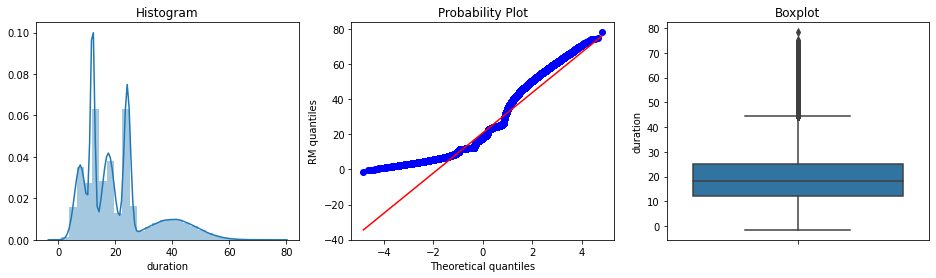

credit_amount


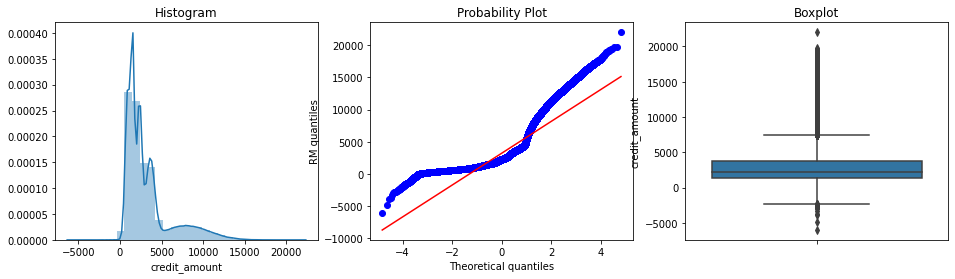

age


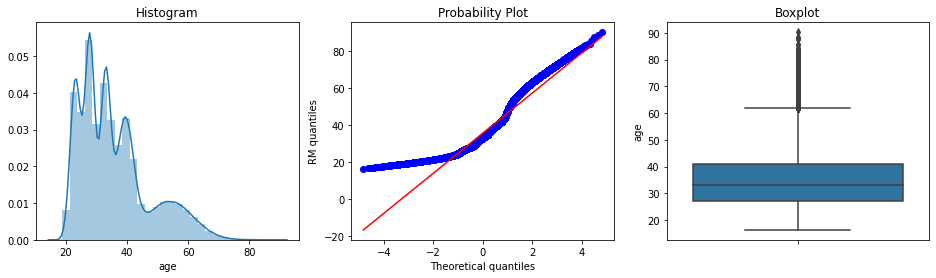

In [24]:
# Let's see how this data look like
for column in data_num:
    print(column)
    diagnostic_plots(data_num, column)

In [25]:
# lets try to transform data_num to see if we can make it linear

data_num_log['age'] =  np.log(data_num['age']) 
data_num_log['credit_amount'] =  np.log(data_num['credit_amount'])
data_num_log['duration'] =  np.log(data_num['duration'])

data_num_sqrt['age'] =  np.sqrt(data_num['age']) 
data_num_sqrt['credit_amount'] =  np.sqrt(data_num['credit_amount'])
data_num_sqrt['duration'] =  np.sqrt(data_num['duration'])

data_num_cbrt['age'] =  np.cbrt(data_num['age']) 
data_num_cbrt['credit_amount'] =  np.cbrt(data_num['credit_amount'])
data_num_cbrt['duration'] =  np.cbrt(data_num['duration'])

data_num_boxcox['age'], param =  stats.boxcox(data_num['age']) 
data_num_boxcox['credit_amount'], param=  stats.boxcox(data_num['credit_amount'])
data_num_boxcox['duration'], param =  stats.boxcox(data_num['duration'])

data_num_yeojohnson['age'], param =  stats.yeojohnson(data_num['age']) 
data_num_yeojohnson['credit_amount'], param=  stats.yeojohnson(data_num['credit_amount'])
data_num_yeojohnson['duration'], param =  stats.yeojohnson(data_num['duration'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/l

duration


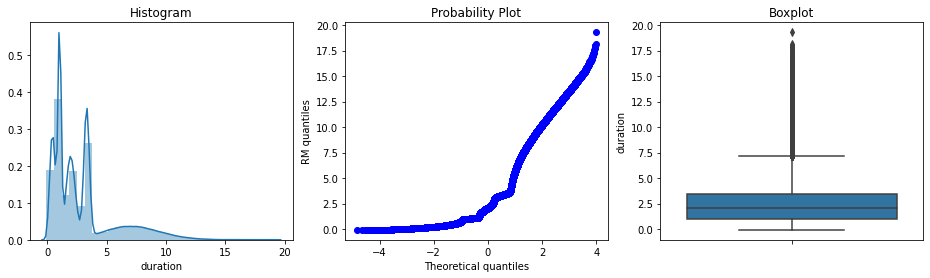

credit_amount


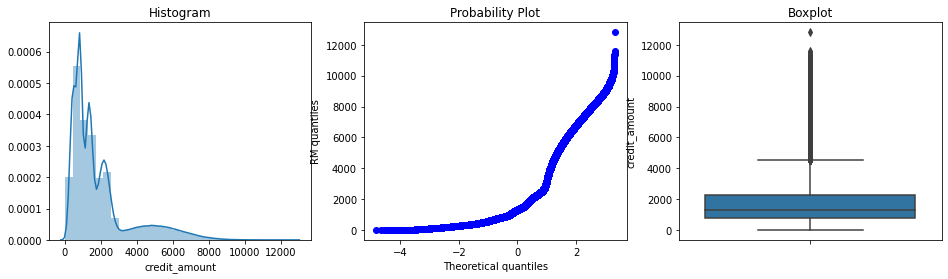

age


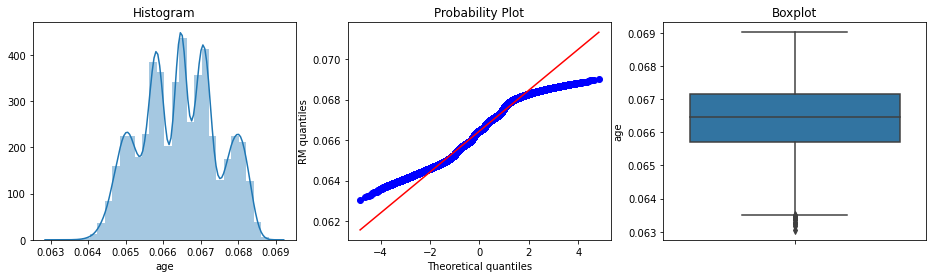

In [26]:
# let's plot transformed data (is it more linear in any of the 5 transformation?)

for column in data_num_sqrt:
    print(column)
    diagnostic_plots(data_num_sqrt, column)

duration


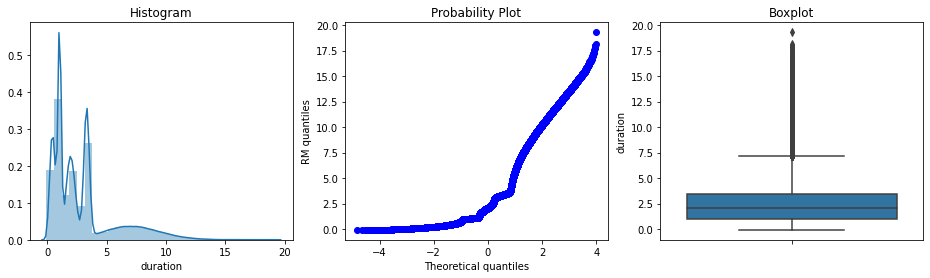

credit_amount


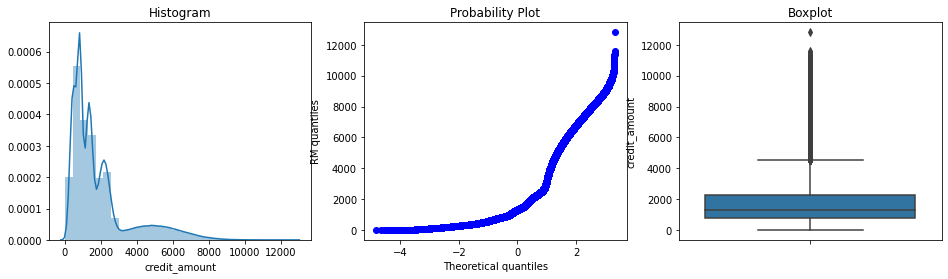

age


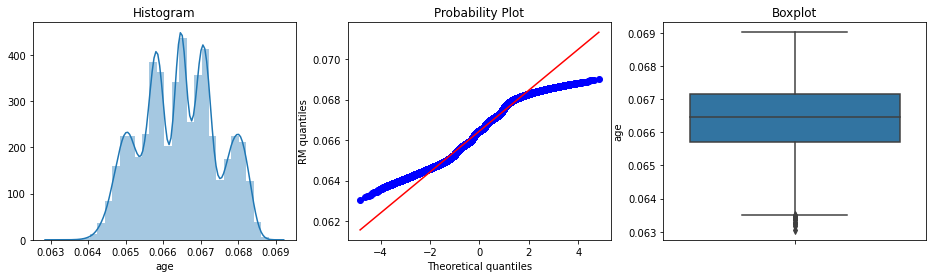

In [27]:
for column in data_num_cbrt:
    print(column)
    diagnostic_plots(data_num_cbrt, column)

duration


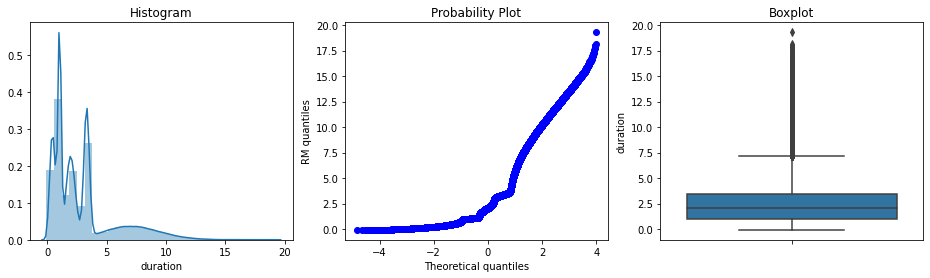

credit_amount


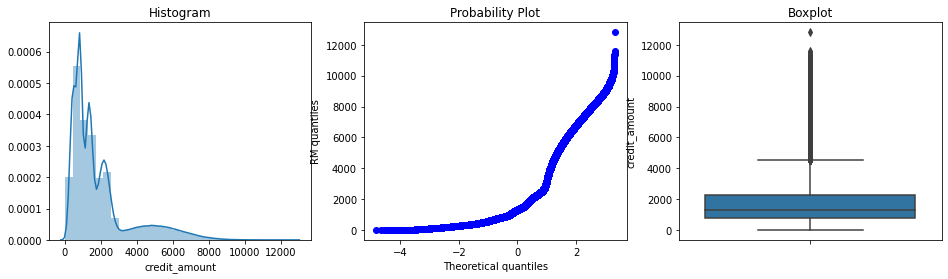

age


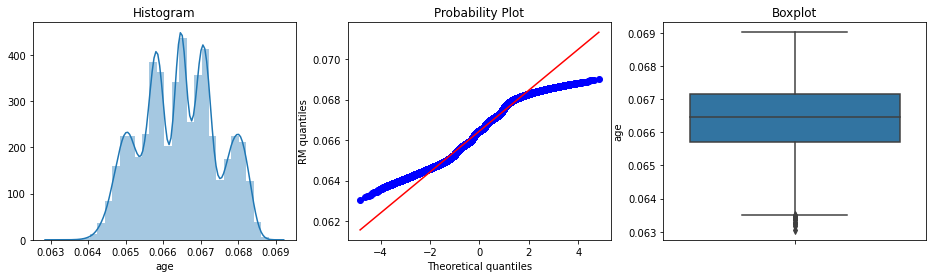

In [28]:
for column in data_num_log:
    print(column)
    diagnostic_plots(data_num_log, column)

duration


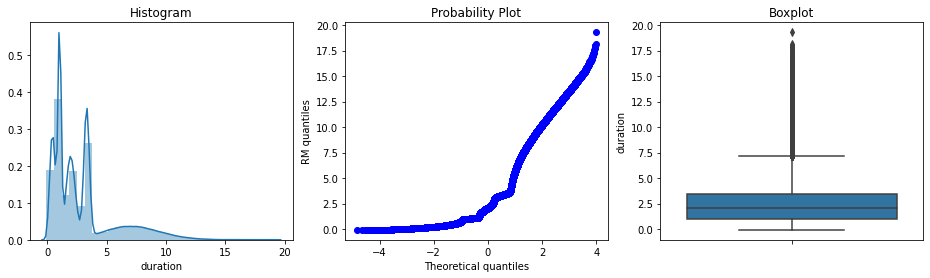

credit_amount


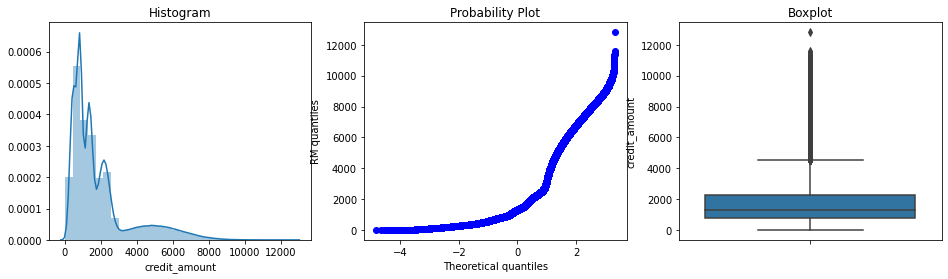

age


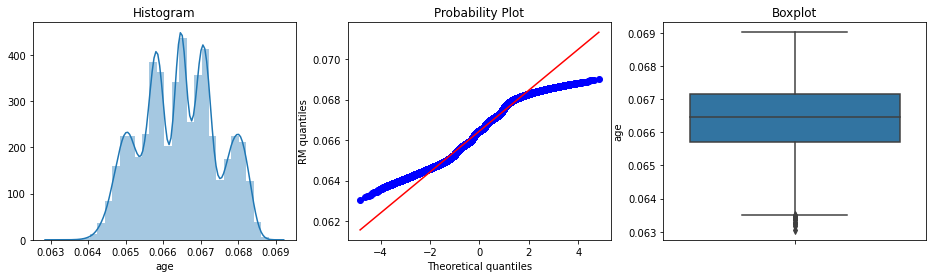

In [29]:
for column in data_num_yeojohnson:
    print(column)
    diagnostic_plots(data_num_yeojohnson, column)

duration


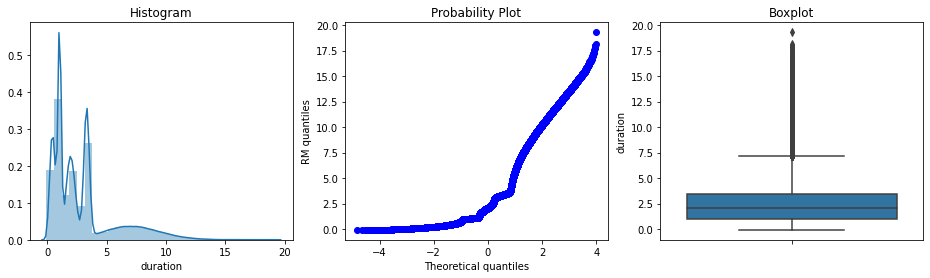

credit_amount


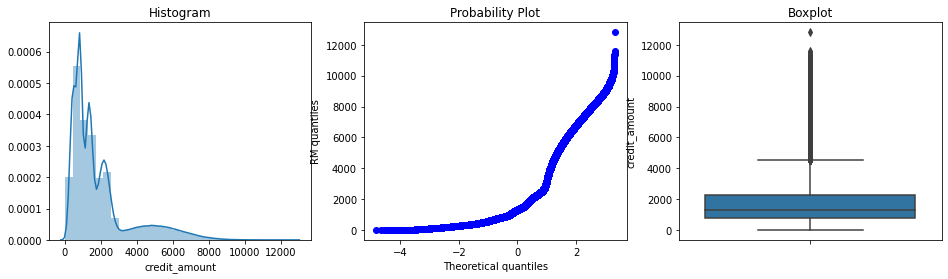

age


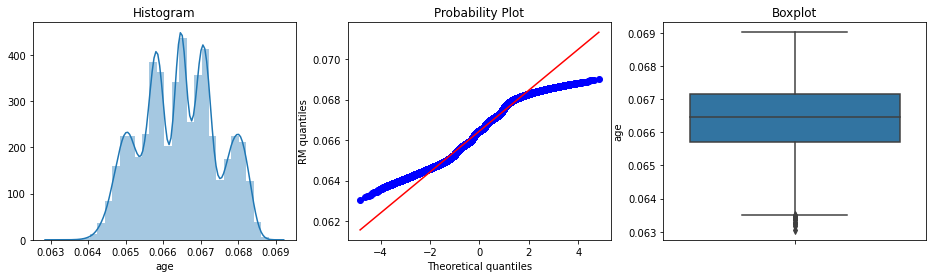

In [30]:
for column in data_num_boxcox:
    print(column)
    diagnostic_plots(data_num_boxcox, column)

In [31]:
# none of the transformation worked to make any of the transformaed values more linear, 
# we will not apply any of it as data transformations. 

In [32]:
# We have to split data first.

In [33]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing',
            'job','own_telephone','foreign_worker','duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']],  # predictors
    data['class'],  # target 
    stratify= data['class'], # make sure rare value are both training and testing data
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((700000, 20), (300000, 20))

In [34]:
# with all catagorical values, we need One Hot Encoding

ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables= features_categorical_casted, # we can select which variables to encode
    drop_last=False) # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                         variables=['checking_status', 'credit_history',
                                    'purpose', 'savings_status', 'employment',
                                    'personal_status', 'other_parties',
                                    'property_magnitude', 'other_payment_plans',
                                    'housing', 'job', 'own_telephone',
                                    'foreign_worker'])

In [35]:
X_train_enc = ohe_enc.transform(X_train.fillna('Missing'))

X_train_enc.head()

duration  credit_amount  ...  foreign_worker_yes  foreign_worker_no
59433   11.991730     964.661322  ...                   1                  0
408875  22.920562    1428.350404  ...                   1                  0
304541   6.636365    1126.760351  ...                   1                  0
21294   16.269664     704.116360  ...                   1                  0
167157  11.981240    2070.992609  ...                   1                  0

[5 rows x 63 columns]

In [36]:
X_train_enc.shape

(700000, 63)

**One Hot Encode**

In [37]:
# Now we should encode test data as well ...

X_test_enc = ohe_enc.transform(X_test.fillna('Missing'))
X_test_enc.head()

duration  credit_amount  ...  foreign_worker_yes  foreign_worker_no
804268  36.095308    3841.673841  ...                   1                  0
750726  32.482929   11184.814109  ...                   1                  0
958188  24.120411    2063.852373  ...                   1                  0
736190  19.496582    1560.145391  ...                   0                  1
628380  12.693553     976.140501  ...                   1                  0

[5 rows x 63 columns]

In [38]:
X_test_enc.shape

(300000, 63)

**Scale Data**

In [39]:
# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_enc)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [40]:
# let's transform the returned NumPy arrays to dataframes 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

In [41]:
np.round(X_train_scaled.describe(), 1)

duration  credit_amount  ...  foreign_worker_yes  foreign_worker_no
count  700000.0       700000.0  ...            700000.0           700000.0
mean        0.3            0.1  ...                 1.0                0.0
std         0.2            0.1  ...                 0.2                0.2
min        -0.0           -0.2  ...                 0.0                0.0
25%         0.2            0.1  ...                 1.0                0.0
50%         0.2            0.1  ...                 1.0                0.0
75%         0.3            0.2  ...                 1.0                0.0
max         1.0            1.0  ...                 1.0                1.0

[8 rows x 63 columns]

We are testing if the data we have is worth it (more than 0.5 score)

In [42]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [43]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=7, scoring="f1")  ## used f1 not accuracy because it's binary

array([0.84755633, 0.85377794, 0.84580127, 0.84937037, 0.84450524,
       0.84543422, 0.84543145])

In [44]:
sgd_pred = sgd_clf.predict(X_test_scaled)

In [45]:
f1_score(y_test, sgd_pred)

0.8529303007281211

In [46]:
confusion_matrix(y_test, sgd_pred)

array([[ 44079,  45989],
       [ 19636, 190296]])

**Using RFE for Feature Selection**

In [47]:
data_vars=X_train_scaled.columns.values.tolist()
y=['y']
X=[i for i in data_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_scaled, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

features = list(X_train_scaled.columns)
support=rfe.support_
ranking =rfe.ranking_

feature_ranking = pd.DataFrame(list(zip(features,support, ranking)), columns =['Features', 'Support','Ranking'])
supported_features_list=feature_ranking.index[feature_ranking['Support']==True].tolist()

supported_features_list_name = []
for i in supported_features_list:
    supported_features_list_name.append(features[i])




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True False False False  True  True False False False  True  True False
  True  True False  True False False False  True  True False False False
  True False  True False  True  True False False False False False False
 False False False False False  True False  True  True False False False
  True False False False  True False False False False False False False
 False False  True]
[ 1 39  8 24  1  1 15  9 10  1  1 20  1  1 19  1 33 38 26  1  1 41 12 32
  1 16  1 23  1  1 21 34 40 22  3  5 25 37  7  6 17  1 27  1  1 36 11 35
  1  4 42 43  1 28  2 31 13 29 30 44 14 18  1]


In [48]:
#select the features from X_tr:
X_tr_RFE=  X_train_scaled.loc[:,supported_features_list_name]

#######################################################################
#bench mark
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

logReg.predict(X_train_scaled)
logReg.predict_proba(X_train_scaled)

print ("benchmark:")
print (logReg.score(X_train_scaled, y_train))

############################################################
#rfe#
logReg_RFE = LogisticRegression(random_state=0).fit(X_tr_RFE, y_train)

logReg_RFE.predict(X_tr_RFE)
logReg_RFE.predict_proba(X_tr_RFE)

print ("RFE:")
print (logReg_RFE.score(X_tr_RFE, y_train))

print ("RFE is not applicable to the data set's feature selection as many features are categorial data, as demoed in the score, removing the unsupported features, the accuracy is dropped")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


benchmark:
0.78415
RFE:
0.7708985714285714
RFE is not applicable to the data set's feature selection as many features are categorial data, as demoed in the score, removing the unsupported features, the accuracy is dropped


RFE is not applicable to the data set's feature selection as many features are categorial data, as demoed in the score, removing the unsupported features, the accuracy is dropped

Data looks good, now we can go wild on prediction models.

**Decision Tree Classifier**

In [49]:
m_dtc = tree.DecisionTreeClassifier()

m_dtc.fit(X_train_scaled,y_train)

cross_val_score(m_dtc, X_train_scaled, y_train, cv=7, scoring="f1")

array([0.79776319, 0.79819377, 0.79727271, 0.79887349, 0.79786853,
       0.79869561, 0.79773635])

In [50]:
pred_dtc =m_dtc.predict(X_test_scaled)

In [51]:
f1_score(y_test, pred_dtc)

0.7984648224411911

In [52]:
confusion_matrix(y_test, pred_dtc)

array([[ 49233,  40835],
       [ 43288, 166644]])

**Logistic Regression**

In [53]:
m_lg= LogisticRegression()

m_lg.fit(X_train_scaled,y_train)

cross_val_score(m_lg, X_train_scaled, y_train, cv=7, scoring="f1")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.8525432 , 0.85394866, 0.85369253, 0.85308302, 0.85266326,
       0.85300373, 0.8533935 ])

In [54]:
pred_lg=m_lg.predict(X_test_scaled)

In [55]:
f1_score(y_test, pred_lg)

0.8532185340432763

In [56]:
confusion_matrix(y_test, pred_lg)

array([[ 46934,  43134],
       [ 21648, 188284]])

**SGD Classifier**

In [57]:
m_sgd = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

m_sgd.fit(X_train_scaled, y_train)

cross_val_score(m_sgd, X_train_scaled, y_train, cv=7, scoring="f1")

array([0.84755633, 0.85377794, 0.84580127, 0.84937037, 0.84450524,
       0.84543422, 0.84543145])

In [58]:
pred_sgd =m_sgd.predict(X_test_scaled)

In [59]:
f1_score(y_test, pred_sgd)

0.8529303007281211

In [60]:
confusion_matrix(y_test, pred_sgd)

array([[ 44079,  45989],
       [ 19636, 190296]])

In [61]:
# Tried MLPClassifier, RandomForestClassifier, ExtraTreesClassifier, KNeighborsClassifier, SVM 
#They took too long, 85% is not bad :)

**Let's see hyper parameter for the best modele, LogisticRegression**

In [62]:
# took too long
# now commenting it to run pipeline #'#


from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=LogisticRegression(), #logistic
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 132.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 189.1min finished


Best Score:  0.854708796697307
Best Params:  {'C': 100, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'saga'}


So, our final model is LogisticRegression with:
{'C': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'liblinear'}

In [64]:
best_pred = grid_result.predict(X_test_scaled)

In [65]:
f1_score(y_test, best_pred)

0.8547144387243892

In [66]:
confusion_matrix(y_test, best_pred)

array([[ 34816,  55252],
       [ 12028, 197904]])

**Pipeline**


Pipelines steps
1. Data Preprocessing by using One hot encoding
2. Data Preprocessing by using Max Abs Scaler
3. Apply LogisticRegression with choosen params

In [67]:
# pipeline in progress



#Below is creating a pipeline with 3 steps
m_final_pipe = Pipeline([
        
        ('OHE', OneHotEncoder(handle_unknown="ignore")),
        ("scaler", MaxAbsScaler()),
        ("m_lg_best", LogisticRegression(C= 1, class_weight= {1: 0.6, 0: 0.4}, penalty= 'l1', solver= 'liblinear', random_state=0))
    ])


In [68]:
m_final_pipe.fit(X_train_scaled, y_train)

Pipeline(memory=None,
         steps=[('OHE',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('scaler', MaxAbsScaler(copy=True)),
                ('m_lg_best',
                 LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l1', random_state=0,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)